✅ Success! PyTorch version: 2.5.1+cu118
CUDA available: True
✓ Libraries loaded
PyTorch version: 2.5.1+cu118
CUDA available: True
Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.5MB/s]


Extracting ../data\MNIST\raw\train-images-idx3-ubyte.gz to ../data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 770kB/s]


Extracting ../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 7.57MB/s]


Extracting ../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.14MB/s]


Extracting ../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\MNIST\raw

✓ Dataset loaded
  Training samples: 60000
  Test samples: 10000


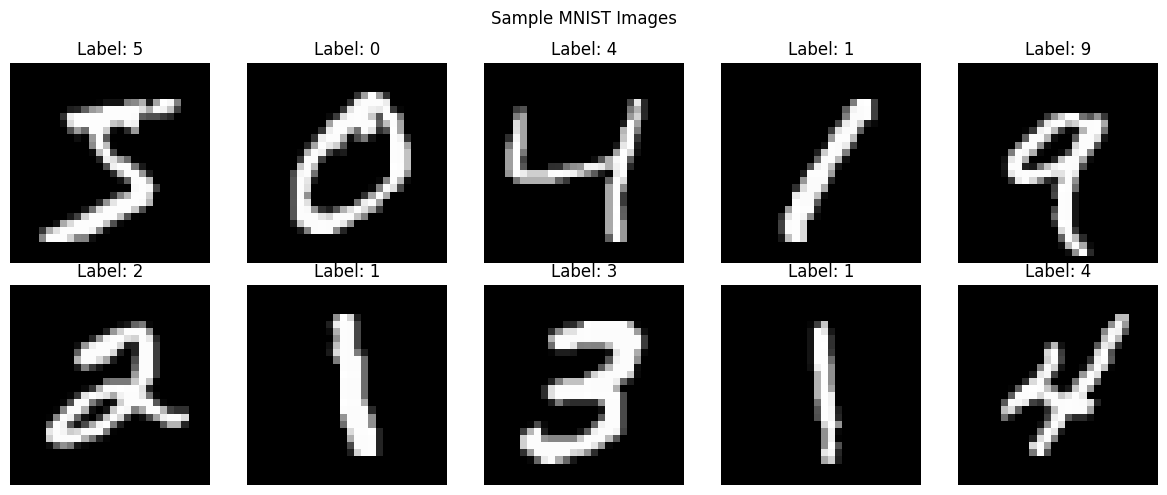

✓ Model initialized
  Device: cuda

Model Architecture:
SimpleConvNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.25, inplace=False)
)

Total parameters: 421,642
Trainable parameters: 421,642

Starting Training

Epoch 1/5
------------------------------------------------------------
  Batch 0/938, Loss: 2.3180, Acc: 6.25%
  Batch 100/938, Loss: 0.1777, Acc: 79.15%
  Batch 200/938, Loss: 0.2002, Acc: 86.58%
  Batch 300/938, Loss: 0.1367, Acc: 89.82%
  Batch 400/938, Loss: 0.0750, Acc: 91.54%
  Batch 500/938, Loss: 0.0708, Acc: 92.56%
  Batch 600/938, Loss: 0.1670, Acc: 93.36%
  Batch 700/938, Loss: 0.0984, Acc: 93.92%
  Batch 800/938

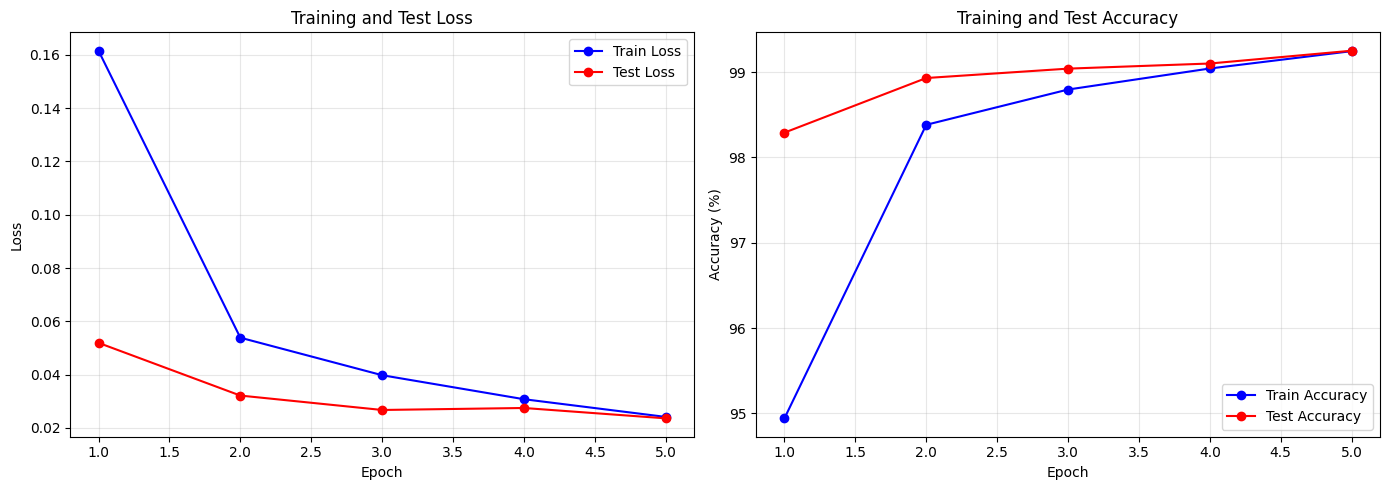


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



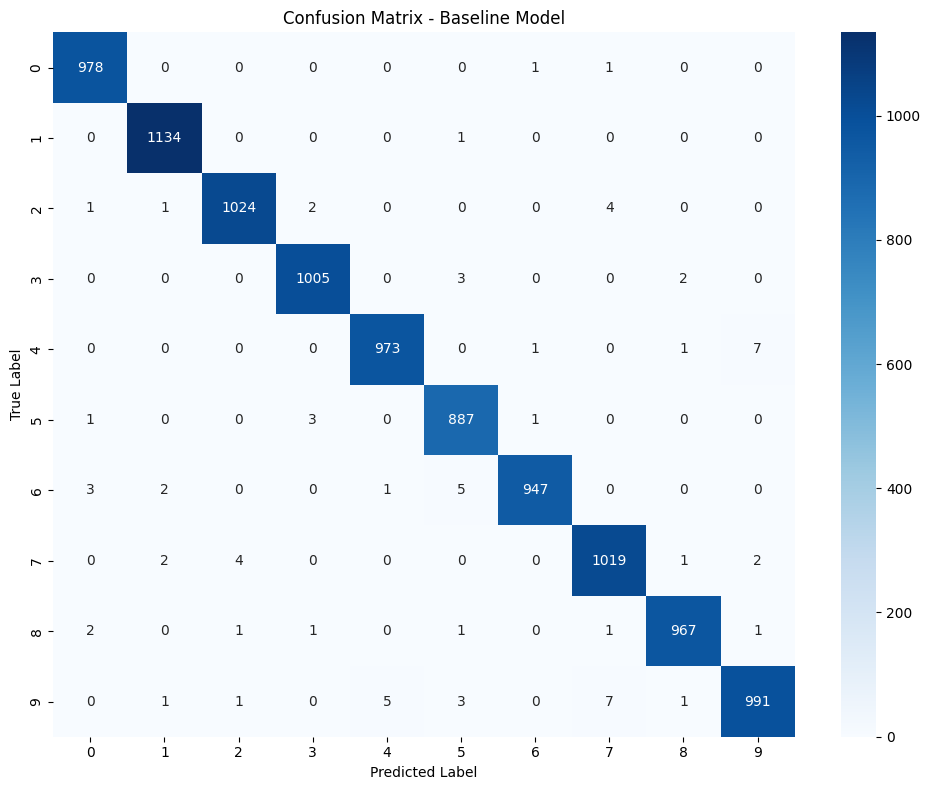

✓ Model saved to ../models/baseline_mnist_cnn.pth
  Test Accuracy: 99.25%
✓ Model info saved


In [1]:
"""
Baseline Model for AI Threat Lab
Train a simple image classifier on MNIST
"""

# ============================================================
# CELL 1: Imports and Setup
# ============================================================

import os
import sys
import ctypes

# 1. Manually point to the DLLs if they failed before
dll_dir = os.path.join(os.path.dirname(sys.executable), "Lib", "site-packages", "torch", "lib")
if os.path.exists(dll_dir):
    os.add_dll_directory(dll_dir)

try:
    import torch
    print(f"✅ Success! PyTorch version: {torch.__version__}")
    print(f"CUDA available: {torch.cuda.is_available()}")
except Exception as e:
    print(f"❌ Still failing: {e}")

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

print("✓ Libraries loaded")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

# ============================================================
# CELL 2: Load and Prepare Data
# ============================================================

# Data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST mean and std
])

# Download MNIST dataset
train_dataset = datasets.MNIST(
    root='../data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root='../data',
    train=False,
    download=True,
    transform=transform
)

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"✓ Dataset loaded")
print(f"  Training samples: {len(train_dataset)}")
print(f"  Test samples: {len(test_dataset)}")

# Visualize sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    img, label = train_dataset[i]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.suptitle('Sample MNIST Images')
plt.tight_layout()
plt.savefig('../diagrams/mnist_samples.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================
# CELL 3: Define Model Architecture
# ============================================================

class SimpleConvNet(nn.Module):
    """
    Simple CNN for MNIST classification
    
    Architecture:
    - Conv1: 1 -> 32 channels, 3x3 kernel
    - Conv2: 32 -> 64 channels, 3x3 kernel
    - FC1: 9216 -> 128
    - FC2: 128 -> 10
    """
    
    def __init__(self):
        super(SimpleConvNet, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        
        # Activation and dropout
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25)
        
    def forward(self, x):
        # Conv block 1
        x = self.pool(self.relu(self.conv1(x)))  # 28x28 -> 14x14
        
        # Conv block 2
        x = self.pool(self.relu(self.conv2(x)))  # 14x14 -> 7x7
        
        # Flatten
        x = x.view(-1, 64 * 7 * 7)
        
        # Fully connected layers
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        
        return x

# Initialize model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleConvNet().to(device)

print("✓ Model initialized")
print(f"  Device: {device}")
print(f"\nModel Architecture:")
print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# ============================================================
# CELL 4: Train the Model
# ============================================================

def train_model(model, train_loader, criterion, optimizer, device):
    """Train for one epoch"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        output = model(data)
        loss = criterion(output, target)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        # Statistics
        running_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()
        
        if batch_idx % 100 == 0:
            print(f'  Batch {batch_idx}/{len(train_loader)}, '
                  f'Loss: {loss.item():.4f}, '
                  f'Acc: {100.*correct/total:.2f}%')
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total
    
    return epoch_loss, epoch_acc

def evaluate_model(model, test_loader, criterion, device):
    """Evaluate the model"""
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
    
    test_loss /= len(test_loader)
    test_acc = 100. * correct / total
    
    return test_loss, test_acc

# Training configuration
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 5

# Training loop
train_losses = []
train_accs = []
test_losses = []
test_accs = []

print("\n" + "="*60)
print("Starting Training")
print("="*60)

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("-" * 60)
    
    # Train
    train_loss, train_acc = train_model(
        model, train_loader, criterion, optimizer, device
    )
    
    # Evaluate
    test_loss, test_acc = evaluate_model(
        model, test_loader, criterion, device
    )
    
    # Store metrics
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    
    print(f"\n  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"  Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

print("\n" + "="*60)
print("Training Complete!")
print(f"Final Test Accuracy: {test_accs[-1]:.2f}%")
print("="*60)

# ============================================================
# CELL 5: Visualize Training Results
# ============================================================

# Plot training curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss curves
ax1.plot(range(1, num_epochs+1), train_losses, 'b-o', label='Train Loss')
ax1.plot(range(1, num_epochs+1), test_losses, 'r-o', label='Test Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Test Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy curves
ax2.plot(range(1, num_epochs+1), train_accs, 'b-o', label='Train Accuracy')
ax2.plot(range(1, num_epochs+1), test_accs, 'r-o', label='Test Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Training and Test Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../diagrams/training_curves.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================
# CELL 6: Detailed Evaluation
# ============================================================

# Get predictions for confusion matrix
model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for data, target in test_loader:
        data = data.to(device)
        output = model(data)
        _, predicted = output.max(1)
        all_preds.extend(predicted.cpu().numpy())
        all_targets.extend(target.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)

# Classification report
print("\nClassification Report:")
print("="*60)
print(classification_report(all_targets, all_preds, 
                          target_names=[str(i) for i in range(10)]))

# Confusion matrix
cm = confusion_matrix(all_targets, all_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - Baseline Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('../diagrams/confusion_matrix_baseline.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================
# CELL 7: Save the Model
# ============================================================

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save model
model_path = '../models/baseline_mnist_cnn.pth'
torch.save({
    'epoch': num_epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_loss': train_losses[-1],
    'test_loss': test_losses[-1],
    'test_accuracy': test_accs[-1],
}, model_path)

print(f"✓ Model saved to {model_path}")
print(f"  Test Accuracy: {test_accs[-1]:.2f}%")

# Save model architecture info
model_info = {
    'architecture': 'SimpleConvNet',
    'input_shape': '(1, 28, 28)',
    'output_classes': 10,
    'total_parameters': total_params,
    'test_accuracy': test_accs[-1],
    'training_epochs': num_epochs,
    'purpose': 'Baseline model for AI threat lab adversarial attack demonstrations',
    'dataset': 'MNIST',
    'threat_relevance': 'Demonstrates model vulnerability to adversarial attacks'
}

import json
with open('../models/baseline_model_info.json', 'w') as f:
    json.dump(model_info, f, indent=2)

print("✓ Model info saved")